In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from google.colab import files
import io
from sklearn.neighbors import KNeighborsRegressor

# Load the data
uploaded = files.upload()
oecd_bli = pd.read_csv(io.BytesIO(uploaded["oecd_bli_2015.csv"]), thousands=',')
uploaded = files.upload()
gdp_per_capita = pd.read_csv(io.BytesIO(uploaded["gdp_per_capita.csv"]), thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")

Saving oecd_bli_2015.csv to oecd_bli_2015 (4).csv


Saving gdp_per_capita.csv to gdp_per_capita (4).csv


In [28]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
  oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
  oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
  gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
  gdp_per_capita.set_index("Country", inplace=True)
  full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
  full_country_stats.sort_values(by="GDP per capita", inplace=True)
  remove_indices = [0, 1, 6, 8, 33, 34, 35]
  keep_indices = list(set(range(36)) - set(remove_indices))
  return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

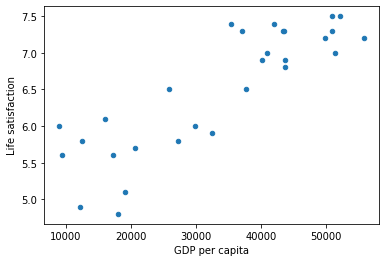

In [29]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [30]:
# Select a linear model
lin_reg_model = sklearn.linear_model.LinearRegression()
# Train the model
lin_reg_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GSP per capita
print(lin_reg_model.predict(X_new)) # outputs [[5.96242338]]

[[5.96242338]]


In [32]:
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(X, y)
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(clf.predict(X_new))

[[5.76666667]]
